In [1]:
#res net model
import tensorflow as tf
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import os
import pickle
import sklearn.metrics as skl


In [2]:
#load data
label_dict = {0 : "no", 1 : "sphere", 2 : "vort"}
with open('pickled/train_imgs.pkl', 'rb') as f:
    train_imgs = pickle.load(f)
with open('pickled/test_imgs.pkl', 'rb') as f:
    test_imgs = pickle.load(f)
with open('pickled/train_labels.pkl', 'rb') as f:
    train_labels = pickle.load(f)
with open('pickled/test_labels.pkl', 'rb') as f:
    test_labels = pickle.load(f)

In [3]:
#one hot encoding
one_hot_fun = tf.keras.Sequential([
    tf.keras.layers.CategoryEncoding(num_tokens=3, output_mode="one_hot")
])

train_labels = one_hot_fun(np.array(train_labels))
test_labels = one_hot_fun(np.array(test_labels))

In [4]:
#load model
model = tf.keras.models.load_model('model_resnet-3')

235/235 [==============================] - 3s 10ms/step - loss: 1.1468 - categorical_accuracy: 0.7273
ROC AUC score: 0.8943703066666666


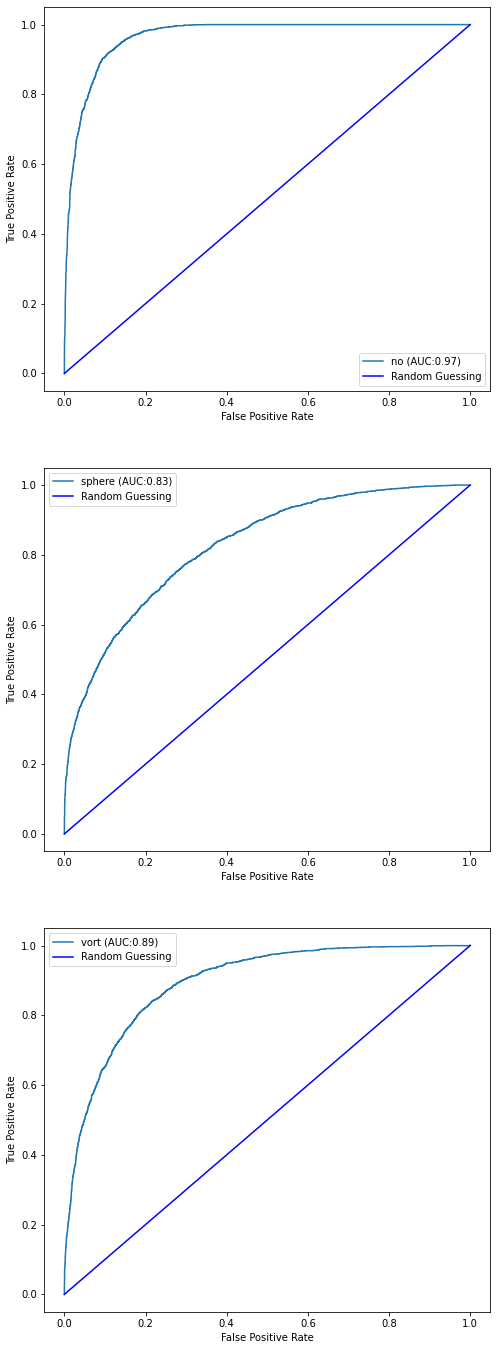

In [5]:
#predict and plot
pred_label = model.predict(test_imgs)
eval = model.evaluate(test_imgs,test_labels)
fig, c_ax = plt.subplots(3,1, figsize = (8, 24), facecolor='white')

def multiclass_roc_auc_score(test, pred, average='macro'):
    for (idx, label) in enumerate(label_dict):
        fpr, tpr, thresholds = skl.roc_curve(test[:,idx], pred[:,idx])
        c_ax[idx].plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (label_dict[label], skl.auc(fpr, tpr)))
        c_ax[idx].plot(fpr, fpr, 'b-', label = 'Random Guessing')
        c_ax[idx].legend()
        c_ax[idx].set_xlabel('False Positive Rate')
        c_ax[idx].set_ylabel('True Positive Rate')
    return skl.roc_auc_score(test, pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(np.array(test_labels), np.array(pred_label)))
plt.savefig('ROC_resnet.png')
plt.show()